In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomPendulum-v0'
env_str="pendulum"
figfilenamehead = "fig_policy_evaluation_pendulum_"

num_iter_max=10000
vae_lr=5e-4

seed = 0


In [2]:
env = gym.make(env_name)


env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

# print(np.random.randn())
# print(torch.randn(1))

c = 0.21455680991172585
2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)
# print(np.random.randn())
# print(torch.randn(1))

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

c = 0.16346495489906906
c = 0.19376823391999684
c = 0.2675319002346239
c = 0.1150324556477333
c = 0.15866847592587133
c = 0.2776789914877983
c = 0.02613878991046221
c = 0.2497859536643814
c = 0.2610036444740457
c = 0.23974756926501706
c = 0.23415875288593663
c = 0.19197630639825713
c = 0.28340067511487516
c = 0.12439858199715707
c = 0.232270106830265
c = 0.17053018466059455
c = 0.1852906491227631
c = 0.18508019906242706
c = 0.20454608973104502
c = 0.13110958613980242
c = 0.01806764148878095
c = 0.2011913608854478
c = 0.03867788929645599
c = 0.10911323128278679
c = 0.1315804540386961
c = 0.03061344322440842
c = 0.04839285536549887
c = 0.07598748076193464
c = 0.07332767760048083
c = 0.03311254234929154
c = 0.04145488540458414
c = 0.11061755119828923
c = 0.02913038273791838
c = 0.02882952236818892
c = 0.14059536049431046
c = 0.18145365592351378
c = 0.011756337676296202
c = 0.03605896836395067
c = 0.035618315686273216
c = 0.12427889835440098
c = 0.20774163581100594
c = 0.07961684728183362


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-315.8621)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str
}

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())
# print(torch.randn(1))

In [7]:
vi.get_real_rollout_mdppolicy_data()

0  c = 0.05388110326789044
1  c = 0.2827750799093791
2  c = 0.15731394332316598
3  c = 0.20314234323342722
4  c = 0.15063167421723392
5  c = 0.2724745137703737
6  c = 0.24329451948004602
7  c = 0.03448564489113446
8  c = 0.12566772795552447
9  c = 0.004399746291621242
10  c = 0.031227579640040103
11  c = 0.09497532330898585
12  c = 0.05687215975334853
13  c = 0.23462364322715343
14  c = 0.10108839803214642
15  c = 0.2078441288160539
16  c = 0.04046623426986205
17  c = 0.1695736073349321
18  c = 0.288753688287829
19  c = 0.16412304069194752
20  c = 0.044365065601949014
21  c = 0.23163072784674504
22  c = 0.047219234627092245
23  c = 0.23200469991445097
24  c = 0.21868805929359805
25  c = 0.29750590192818915
26  c = 0.24245242700472103
27  c = 0.2488176727931419
28  c = 0.1037594269002593
29  c = 0.03450842388232006
30  c = 0.2899819933464779
31  c = 0.17124773921915185
32  c = 0.07015124845123409
33  c = 0.0036764408548930925
34  c = 0.07202494056398641
35  c = 0.08517896100238877
36  c

tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

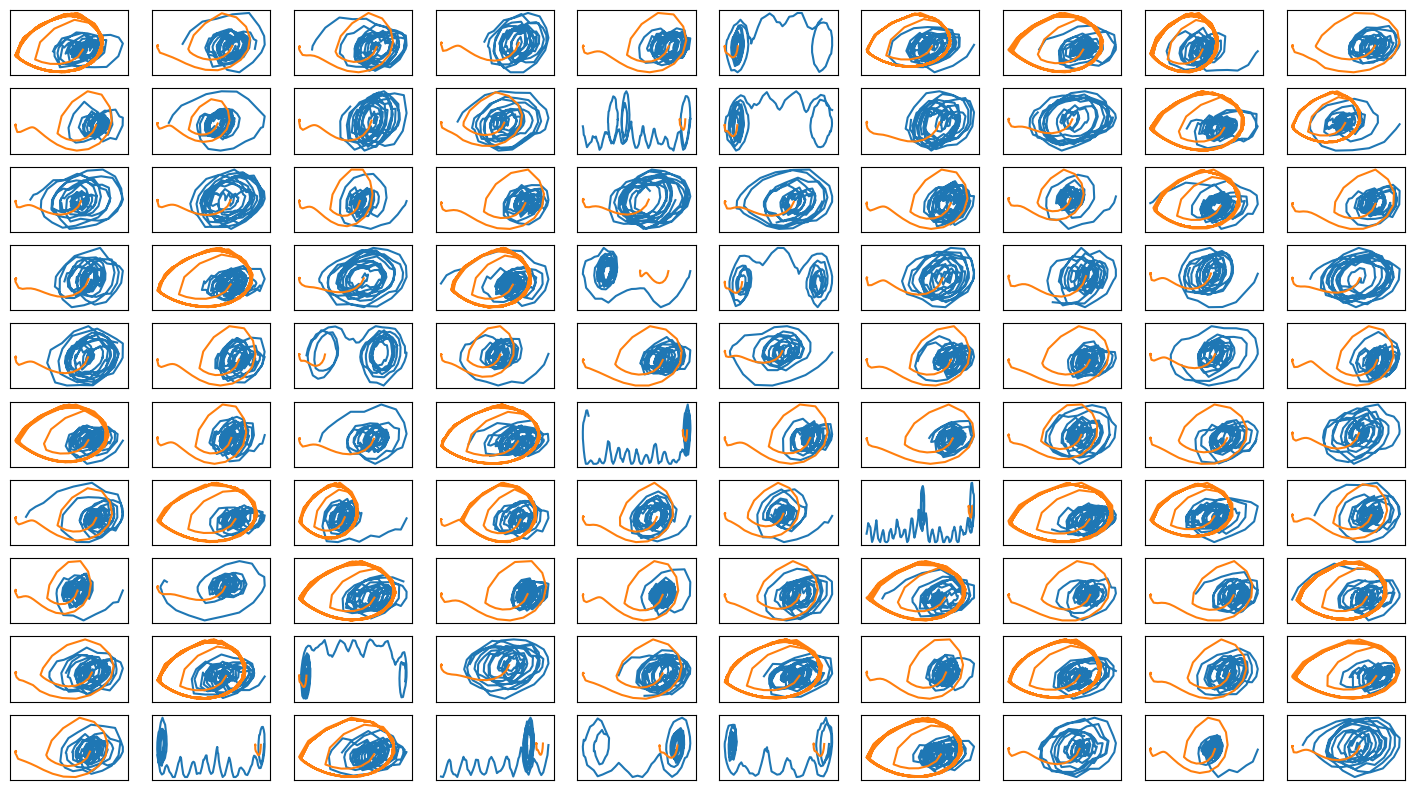

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [ ]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

vi.save()


train_vae: enc_dec
train: iter 0  trainloss 1607392.38277  validloss 1491.04003±0.00000  bestvalidloss 1491.04003  last_update 0
train: iter 1  trainloss 606.12387  validloss 485.96077±0.00000  bestvalidloss 485.96077  last_update 0
train: iter 2  trainloss 490.11660  validloss 477.82732±0.00000  bestvalidloss 477.82732  last_update 0
train: iter 3  trainloss 474.13300  validloss 476.91622±0.00000  bestvalidloss 476.91622  last_update 0
train: iter 4  trainloss 462.92298  validloss 464.36157±0.00000  bestvalidloss 464.36157  last_update 0
train: iter 5  trainloss 491.01831  validloss 451.41208±0.00000  bestvalidloss 451.41208  last_update 0
train: iter 6  trainloss 457.60271  validloss 445.39574±0.00000  bestvalidloss 445.39574  last_update 0
train: iter 7  trainloss 460.50418  validloss 442.08346±0.00000  bestvalidloss 442.08346  last_update 0
train: iter 8  trainloss 442.86573  validloss 439.78797±0.00000  bestvalidloss 439.78797  last_update 0
train: iter 9  trainloss 452.18492  val

train: iter 78  trainloss -150.46997  validloss -129.59555±0.00000  bestvalidloss -129.59555  last_update 0
train: iter 79  trainloss -162.13284  validloss -146.42944±0.00000  bestvalidloss -146.42944  last_update 0
train: iter 80  trainloss -173.49956  validloss -152.54004±0.00000  bestvalidloss -152.54004  last_update 0
train: iter 81  trainloss -177.36959  validloss -132.45226±0.00000  bestvalidloss -152.54004  last_update 1
train: iter 82  trainloss -187.55441  validloss -173.09803±0.00000  bestvalidloss -173.09803  last_update 0
train: iter 83  trainloss -197.34882  validloss -106.11164±0.00000  bestvalidloss -173.09803  last_update 1
train: iter 84  trainloss -210.48621  validloss -161.06683±0.00000  bestvalidloss -173.09803  last_update 2
train: iter 85  trainloss -208.66508  validloss -181.51366±0.00000  bestvalidloss -181.51366  last_update 0
train: iter 86  trainloss -223.05861  validloss -194.17103±0.00000  bestvalidloss -194.17103  last_update 0
train: iter 87  trainloss -2

train: iter 154  trainloss -569.50908  validloss -510.88160±0.00000  bestvalidloss -539.84043  last_update 3
train: iter 155  trainloss -570.74522  validloss -553.80489±0.00000  bestvalidloss -553.80489  last_update 0
train: iter 156  trainloss -571.72061  validloss -519.14045±0.00000  bestvalidloss -553.80489  last_update 1
train: iter 157  trainloss -564.99775  validloss -561.61271±0.00000  bestvalidloss -561.61271  last_update 0
train: iter 158  trainloss -564.39744  validloss -557.27854±0.00000  bestvalidloss -561.61271  last_update 1
train: iter 159  trainloss -579.49554  validloss -550.10255±0.00000  bestvalidloss -561.61271  last_update 2
train: iter 160  trainloss -578.63849  validloss -542.33225±0.00000  bestvalidloss -561.61271  last_update 3
train: iter 161  trainloss -584.73617  validloss -549.01946±0.00000  bestvalidloss -561.61271  last_update 4
train: iter 162  trainloss -593.68198  validloss -558.71596±0.00000  bestvalidloss -561.61271  last_update 5
train: iter 163  tr

train: iter 230  trainloss -647.94287  validloss -626.56720±0.00000  bestvalidloss -631.17452  last_update 18
train: iter 231  trainloss -636.97892  validloss -559.71491±0.00000  bestvalidloss -631.17452  last_update 19
train: iter 232  trainloss -643.91101  validloss -594.71771±0.00000  bestvalidloss -631.17452  last_update 20
train: iter 233  trainloss -640.56649  validloss -621.24714±0.00000  bestvalidloss -631.17452  last_update 21
train: iter 234  trainloss -653.11425  validloss -595.65251±0.00000  bestvalidloss -631.17452  last_update 22
train: iter 235  trainloss -661.74059  validloss -604.03484±0.00000  bestvalidloss -631.17452  last_update 23
train: iter 236  trainloss -649.46475  validloss -594.26110±0.00000  bestvalidloss -631.17452  last_update 24
train: iter 237  trainloss -658.93215  validloss -600.62661±0.00000  bestvalidloss -631.17452  last_update 25
train: iter 238  trainloss -663.95652  validloss -591.21494±0.00000  bestvalidloss -631.17452  last_update 26
train: ite

In [ ]:
vi.load()
# vi.update_mulogvar_offlinedata()

In [ ]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

In [ ]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [ ]:
print(datetime.datetime.now())

In [ ]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


In [ ]:
print(vi.initial_belief)
vi.save()

In [ ]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

In [ ]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [ ]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

In [ ]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

In [ ]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])